# A Guided Implementation

We should be able to guide the search.

In [1]:
import random
import logging
from typing import Generator
from math import comb, log, ceil, floor


logger = logging.getLogger()
logger.handlers.clear()
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)


def find_min_value_given_probability(N, n, target_probability):
    # Calculate the total combinations for the sample
    total_combinations = comb(N, n)

    #print(f'N = {N}')
    #print(f'n = {n}')
    #print(f'target_probability = {target_probability}')
    
    m = 1
    # Smallest known m where P(m) > target.
    m_min = m - 1
    # Largest known m where P(m) <= target.
    m_max = N - n + 1

    previous = None
    
    while m_min < m_max:
        current_combination = comb(N - m, n)
        probability = current_combination / total_combinations

        #print(f'm = {m}')
        #print(f'm_min = {m_min}')
        #print(f'm_max = {m_max}')
        #print(f'probability = {probability}')
        
        if probability <= target_probability:
            if m_min + 1 == m:
                return m
            else:
                m_max = m
                m -= ceil((m - m_min) / 2)
        else:
            m_min = m
            m_step = ceil(log(target_probability) / log(probability))
            #print(f'm_step = {m_step}')
            m_max = min(m_max, m + m_step)
            #print(f'next m_max = {m_max}')
            m += ceil((m_max - m) / 2)

        if m_min == m and m == m_max:
            if previous == m:
                print('BUG')
            previous = m
            

    return m


def generate_unique_random_numbers(min_num: int, max_num: int, batch_size: int) -> Generator[int, None, None]:
    if max_num - min_num + 1 < batch_size:
        raise ValueError("Range is too small to generate the requested number of unique random numbers.")

    n = batch_size

    while n > 0:
        N = max_num - min_num + 1
        random_probability = random.random()
        #print(f'min_num = {min_num}')
        #print(f'max_num = {max_num}')
        m = find_min_value_given_probability(N, n, random_probability)
        #print(f'result m = {m}')
        number = min_num + m - 1
        #print(f'number = {number}')
        #print('')
        min_num = number + 1
        n -= 1
        yield number

In [2]:
find_min_value_given_probability(10, 3, 0.008263919290897537)

7

In [3]:
list(generate_unique_random_numbers(1, 10, 3))

[1, 2, 10]

## Distribution

The distribution of this approach is even.

Chi-Square Statistic: 6.861333333333333
P-Value: 0.6515540118526508


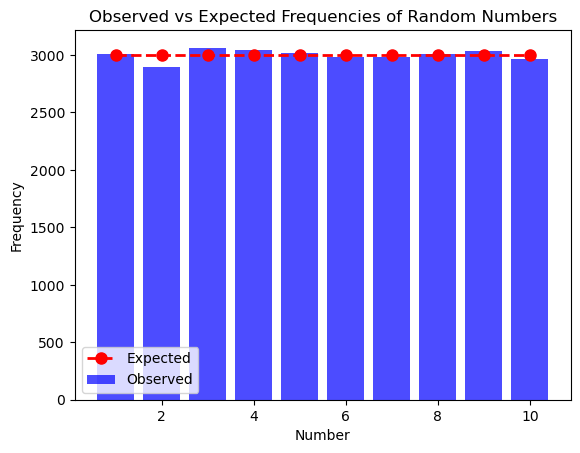

In [4]:
import run

logger.setLevel(logging.DEBUG)

run.plot(generate_unique_random_numbers, 1, 10, 3, 10000)

## Execution Time

The execution time here is no better.

Perhaps we are overshooting and back tracking just the same as we would for a non guided search.

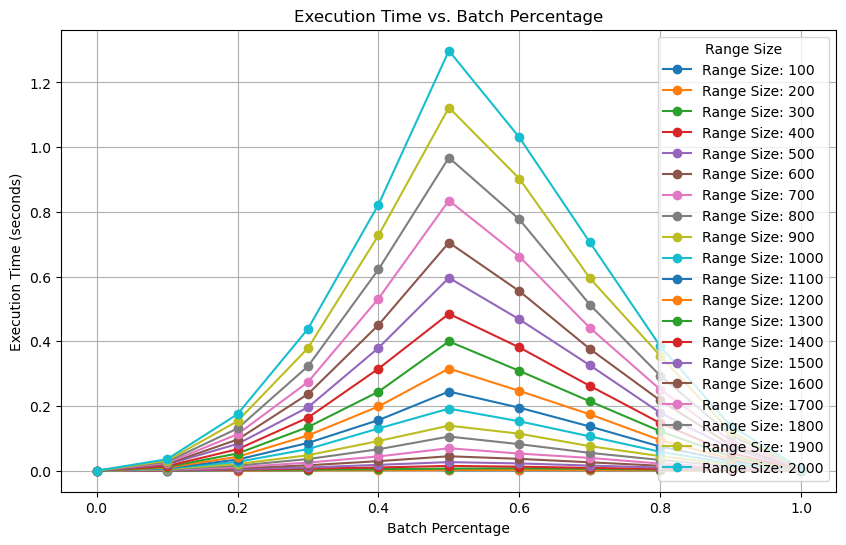

In [7]:
import plot

df = run.measure_time(lambda range_size, batch_size: generate_unique_random_numbers(1, range_size, batch_size), range(100,2001,100), 10)
plot.execution_time(df)

## Memory Usage

The memory usage is constant.